In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text
import seaborn as sns

In [2]:
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

In [5]:
cur_season_df = LeagueDashPlayerStats(season='2020-21', per_mode_detailed='PerGame').get_data_frames()[0]

In [9]:
last_season_df = LeagueDashPlayerStats(season='2019-20', per_mode_detailed='PerGame').get_data_frames()[0]

In [10]:
cur_season_df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,203932,Aaron Gordon,1610612753,ORL,25.0,13,6,7,0.462,28.3,...,93,260,52,82,244,71,48,14,5,"203932,1610612753"
1,1628988,Aaron Holiday,1610612754,IND,24.0,13,8,5,0.615,21.1,...,172,133,313,273,143,272,70,14,5,"1628988,1610612754"
2,1630174,Aaron Nesmith,1610612738,BOS,21.0,5,3,2,0.600,13.2,...,117,125,435,379,429,397,128,14,5,"1630174,1610612738"
3,1627846,Abdel Nader,1610612756,PHX,27.0,1,0,1,0.000,3.3,...,367,442,262,397,120,406,128,14,5,"1627846,1610612756"
4,1629690,Adam Mokoka,1610612741,CHI,22.0,6,1,5,0.167,6.9,...,367,373,435,404,282,405,128,14,5,"1629690,1610612741"


In [21]:
merged_df = pd.merge(left=cur_season_df, right=last_season_df, on='PLAYER_ID', suffixes=('_CUR', '_LAST'))

In [30]:
merged_df = merged_df.loc[(merged_df.GP_CUR > 5) & (merged_df.MIN_CUR > 15) & (merged_df.GP_LAST > 20)]

In [31]:
merged_df.loc[:, 'PTS_DIFF'] = merged_df.PTS_CUR - merged_df.PTS_LAST

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:

sorted_df = merged_df.sort_values(by='PTS_DIFF', ascending=False)

In [46]:
top_improved = sorted_df.iloc[:10].sort_values(by='PTS_DIFF')

In [38]:

plt.style.use('fivethirtyeight')

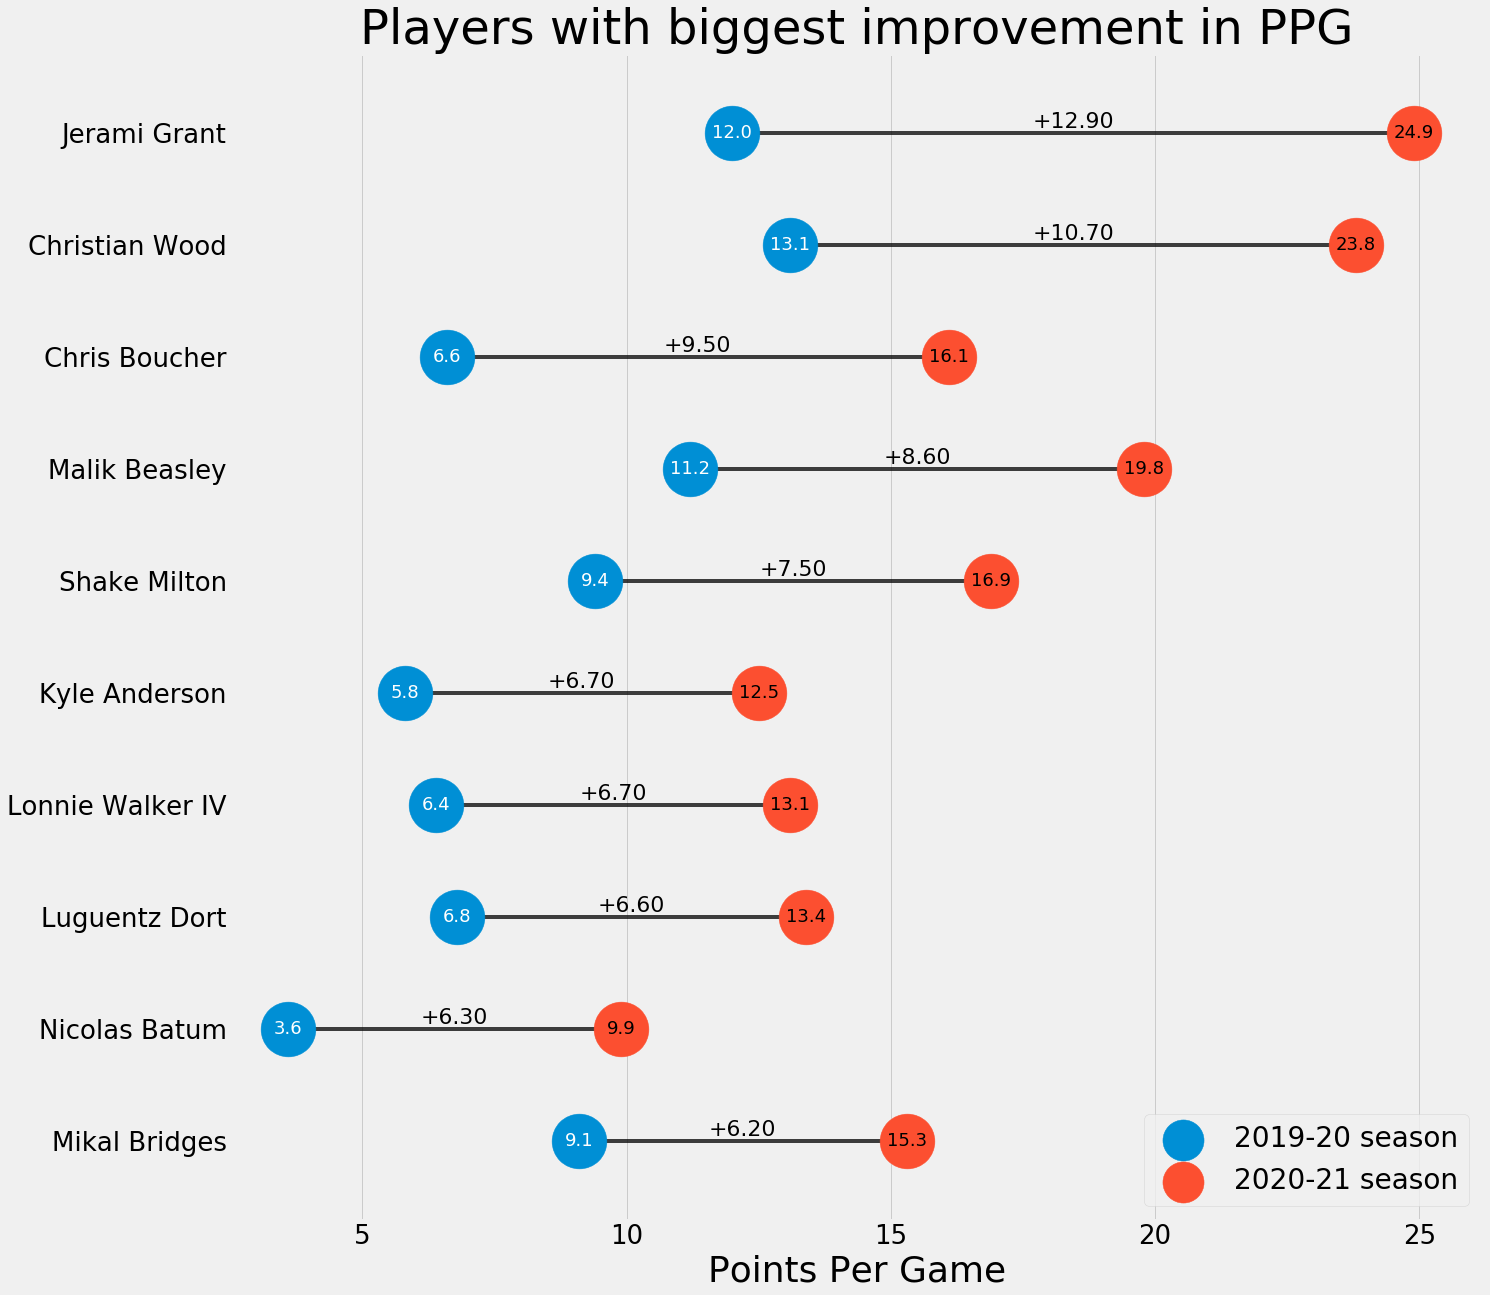

In [76]:
fig, ax = plt.subplots(figsize=(20, 20))

title_size = 48
label_size = 36
tick_size = 26

ax.scatter(x=top_improved.PTS_LAST, y=top_improved.PLAYER_NAME_CUR, s=3000, zorder=2, label='2019-20 season')
ax.scatter(x=top_improved.PTS_CUR, y=top_improved.PLAYER_NAME_CUR, s=3000, zorder=2, label='2020-21 season')

ax.hlines(y=top_improved.PLAYER_NAME_CUR, xmin=top_improved.PTS_LAST, xmax=top_improved.PTS_CUR, alpha=0.75, zorder=1)
for i in range(len(top_improved)):
    item = top_improved.iloc[i]
    ax.text(x=item.PTS_LAST, y=item.PLAYER_NAME_CUR, s=item.PTS_LAST, ha='center', va='center', size=18, color='white')
    ax.text(x=item.PTS_CUR, y=item.PLAYER_NAME_CUR, s=item.PTS_CUR, ha='center', va='center', size=18)
    ax.text(x=(item.PTS_CUR+item.PTS_LAST) / 2, y=i+0.1, s=f"+{item.PTS_DIFF:.2f}", ha='center', va='center', size=22)

ax.grid(b=False, axis='y')
ax.tick_params(labelsize=tick_size)
ax.set_title('Players with biggest improvement in PPG', size=title_size)
ax.set_xlabel('Points Per Game', size=label_size)
ax.legend(fontsize=28, loc='lower right', markerscale=0.75)

In [77]:
cur_season_df_100 = LeagueDashPlayerStats(season='2020-21', per_mode_detailed='Per100Possessions').get_data_frames()[0]

last_season_df_100 = LeagueDashPlayerStats(season='2019-20', per_mode_detailed='Per100Possessions').get_data_frames()[0]

In [81]:
merged_df = pd.merge(left=cur_season_df_100, right=last_season_df_100, on='PLAYER_ID', suffixes=('_CUR', '_LAST'))

merged_df = merged_df.loc[(merged_df.GP_CUR > 5) & (merged_df.MIN_CUR > 15) & (merged_df.GP_LAST > 20)]

merged_df.loc[:, 'PTS_DIFF'] = merged_df.PTS_CUR - merged_df.PTS_LAST

In [82]:

sorted_df = merged_df.sort_values(by='PTS_DIFF', ascending=False)

top_improved = sorted_df.iloc[:10].sort_values(by='PTS_DIFF')

In [85]:
sorted_df

,PLAYER_ID,PLAYER_NAME_CUR,TEAM_ID_CUR,TEAM_ABBREVIATION_CUR,AGE_CUR,GP_CUR,W_CUR,L_CUR,W_PCT_CUR,MIN_CUR,...,PF_RANK_LAST,PFD_RANK_LAST,PTS_RANK_LAST,PLUS_MINUS_RANK_LAST,NBA_FANTASY_PTS_RANK_LAST,DD2_RANK_LAST,TD3_RANK_LAST,CFID_LAST,CFPARAMS_LAST,PTS_DIFF
8,1628035,Alfonzo McKinnie,1610612747,LAL,28.0,9,8,1,0.889,44.0,...,106,422,404,430,423,187,29,5,"1628035,1610612739",15.9
182,203924,Jerami Grant,1610612765,DET,26.0,13,3,10,0.231,48.7,...,298,119,160,306,281,239,29,5,"203924,1610612743",11.6
156,203210,JaMychal Green,1610612743,DEN,30.0,10,6,4,0.600,49.1,...,82,478,393,105,309,79,29,5,"203210,1610612746",10.8
289,201587,Nicolas Batum,1610612746,LAC,32.0,14,10,4,0.714,49.1,...,286,375,514,371,374,239,29,5,"201587,1610612766",9.4
377,201961,Wayne Ellington,1610612765,DET,33.0,8,2,6,0.250,46.8,...,366,444,366,285,457,239,29,5,"201961,1610612752",9.1
41,203468,CJ McCollum,1610612757,POR,29.0,13,8,5,0.615,47.3,...,401,360,57,224,135,101,29,5,"203468,1610612757",8.5
244,1629652,Luguentz Dort,1610612760,OKC,21.0,13,6,7,0.462,48.0,...,109,208,409,144,490,239,29,5,"1629652,1610612760",8.3
143,1628977,Hamidou Diallo,1610612760,OKC,22.0,13,6,7,0.462,45.5,...,136,254,329,212,376,115,29,5,"1628977,1610612760",8.3
52,1628449,Chris Boucher,1610612761,TOR,28.0,13,5,8,0.385,46.9,...,59,89,128,92,38,92,29,5,"1628449,1610612761",8.1
270,1628969,Mikal Bridges,1610612756,PHX,24.0,12,7,5,0.583,49.2,...,335,287,386,161,342,187,29,5,"1628969,1610612756",7.8


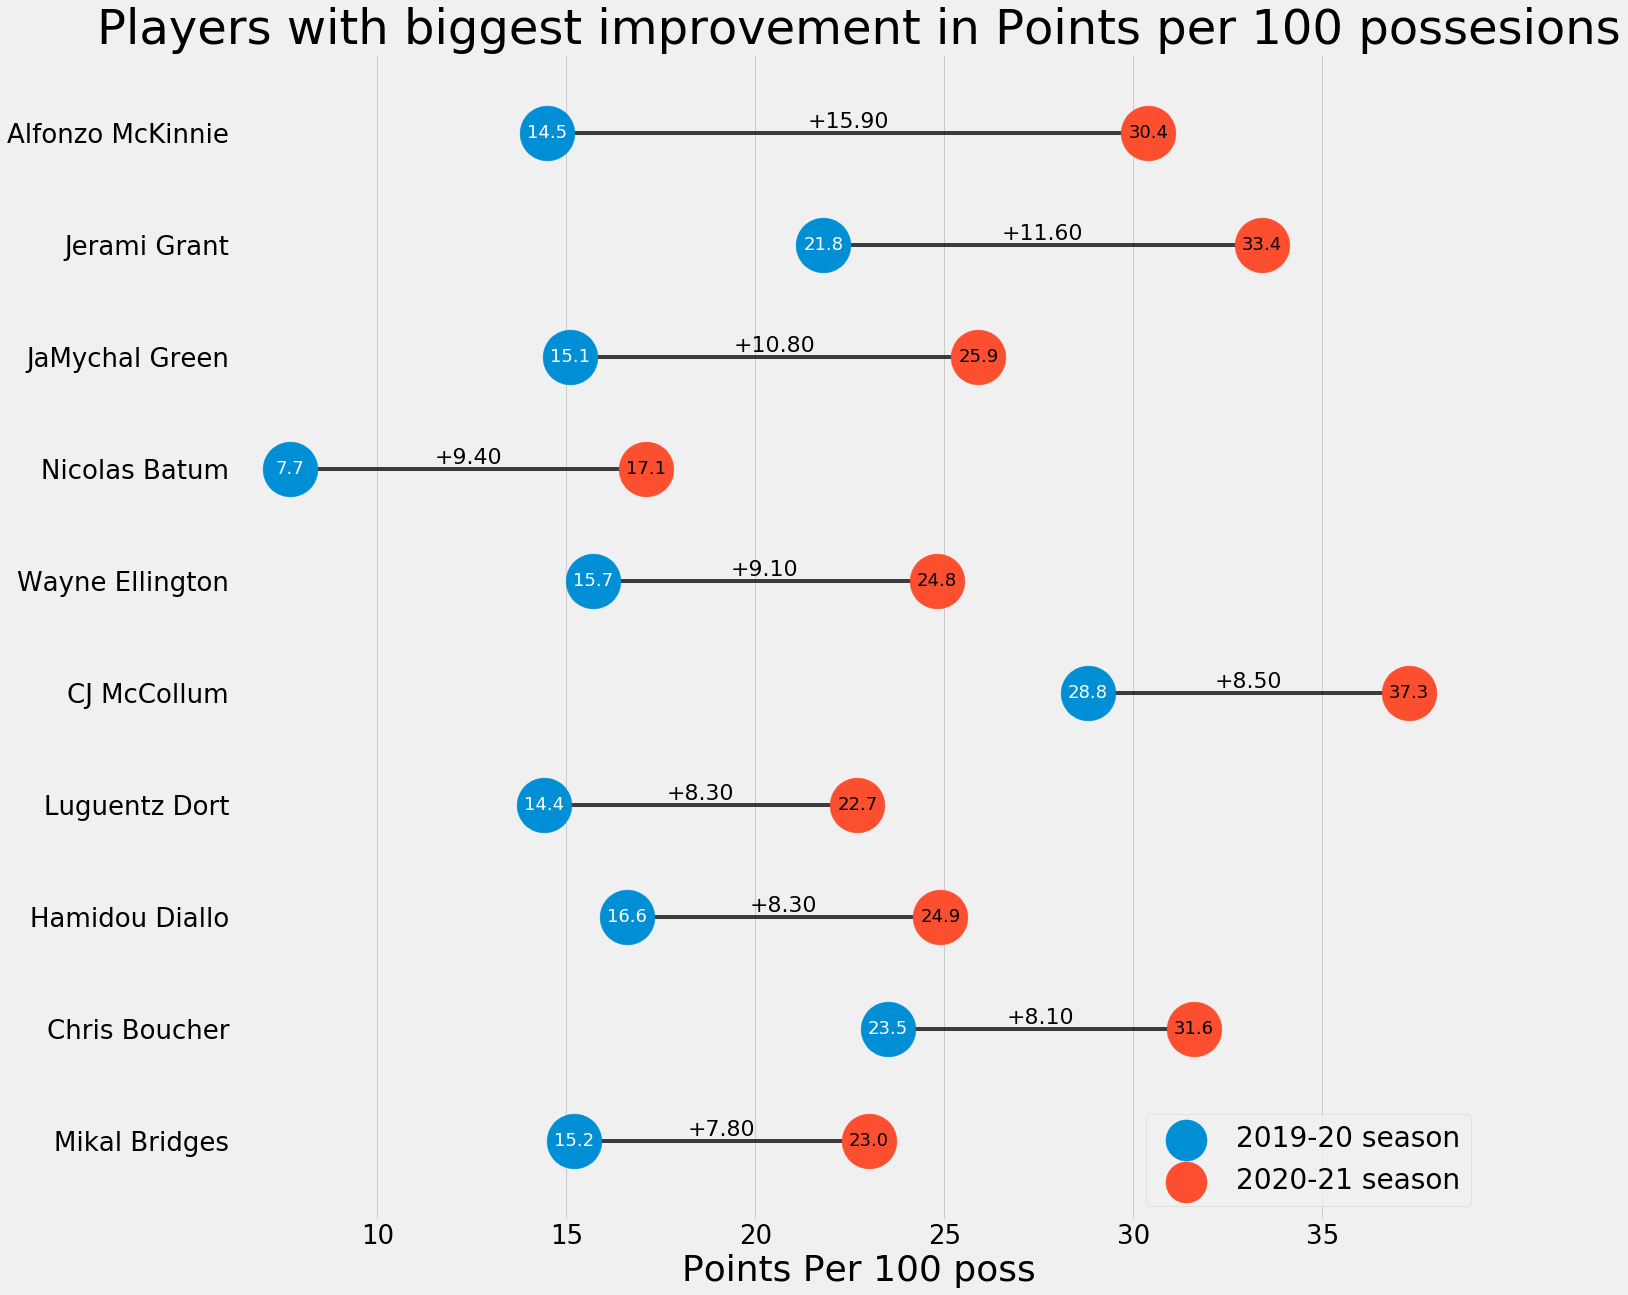

In [83]:
fig, ax = plt.subplots(figsize=(20, 20))

title_size = 48
label_size = 36
tick_size = 26

ax.scatter(x=top_improved.PTS_LAST, y=top_improved.PLAYER_NAME_CUR, s=3000, zorder=2, label='2019-20 season')
ax.scatter(x=top_improved.PTS_CUR, y=top_improved.PLAYER_NAME_CUR, s=3000, zorder=2, label='2020-21 season')

ax.hlines(y=top_improved.PLAYER_NAME_CUR, xmin=top_improved.PTS_LAST, xmax=top_improved.PTS_CUR, alpha=0.75, zorder=1)
for i in range(len(top_improved)):
    item = top_improved.iloc[i]
    ax.text(x=item.PTS_LAST, y=item.PLAYER_NAME_CUR, s=item.PTS_LAST, ha='center', va='center', size=18, color='white')
    ax.text(x=item.PTS_CUR, y=item.PLAYER_NAME_CUR, s=item.PTS_CUR, ha='center', va='center', size=18)
    ax.text(x=(item.PTS_CUR+item.PTS_LAST) / 2, y=i+0.1, s=f"+{item.PTS_DIFF:.2f}", ha='center', va='center', size=22)

ax.grid(b=False, axis='y')
ax.tick_params(labelsize=tick_size)
ax.set_title('Players with biggest improvement in Points per 100 possesions', size=title_size)
ax.set_xlabel('Points Per 100 poss', size=label_size)
ax.legend(fontsize=28, loc='lower right', markerscale=0.75)